# Imports

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

# Buscando dados em CSVs

In [3]:
# Servidor com BubbleSort
df_b1 = pd.read_csv("../Test/Results/BSort.csv")
df_b2 = pd.read_csv("../Test/Results/BSort2.csv")
df_b3 = pd.read_csv("../Test/Results/BSort3.csv")
# Servidor com QuickSort
df_q1 = pd.read_csv("../Test/Results/QSort.csv")
df_q2 = pd.read_csv("../Test/Results/QSort2.csv")
df_q3 = pd.read_csv("../Test/Results/QSort3.csv")
# Servidor com QuickSort e Clusters
df_cq1 = pd.read_csv("../Test/Results/QSortC.csv")
df_cq2 = pd.read_csv("../Test/Results/QSortC2.csv")
df_cq3 = pd.read_csv("../Test/Results/QSortC3.csv")

In [5]:
df_b1.columns

Index(['timeStamp', 'elapsed', 'label', 'responseCode', 'responseMessage',
       'threadName', 'dataType', 'success', 'failureMessage', 'bytes',
       'sentBytes', 'grpThreads', 'allThreads', 'URL', 'Latency', 'IdleTime',
       'Connect'],
      dtype='object')

Vamos observar a coluna Latency a qual representa o tempo até o primeiro bit da resposta ser recebido:

# Analisando os dados
De acordo com o site oficial do [JMeter](https://jmeter.apache.org/usermanual/listeners.html#csvlogformat) no manual do usuário sobre o formato do log do csv:
- timeStamp - in milliseconds since 1/1/1970
- elapsed - in milliseconds
- label - sampler label
- responseCode - e.g. 200, 404
- responseMessage - e.g. OK
- threadName
- dataType - e.g. text
- success - true or false
- failureMessage - if any
- bytes - number of bytes in the sample
- sentBytes - number of bytes sent for the sample
- grpThreads - number of active threads in this thread group
- allThreads - total number of active threads in all groups
- URL
- latency - time to first response
- connect - time to establish connection
- IdleTime - number of milliseconds of 'Idle' time (normally 0)

In [20]:
def calc_error_percentage(df):
    error_count = len(df[df['success'] == False])
    return error_count / len(df)

def describe_latency(latency):
    return latency.describe()

In [15]:
print(f"Error percentage on B1 {(calc_error_percentage(df_b1) * 100):.2f}")
print(f"Error percentage on B2 {(calc_error_percentage(df_b2) * 100):.2f}")
print(f"Error percentage on B3 {(calc_error_percentage(df_b3) * 100):.2f}")

Error percentage on B1 57.75
Error percentage on B2 62.18
Error percentage on B3 61.89


In [16]:
print(f"Error percentage on Q1 {(calc_error_percentage(df_q1) * 100):.2f}")
print(f"Error percentage on Q2 {(calc_error_percentage(df_q2) * 100):.2f}")
print(f"Error percentage on Q3 {(calc_error_percentage(df_q3) * 100):.2f}")

Error percentage on Q1 0.00
Error percentage on Q2 2.86
Error percentage on Q3 0.00


In [17]:
print(f"Error percentage on CQ1 {(calc_error_percentage(df_cq1) * 100):.2f}")
print(f"Error percentage on CQ2 {(calc_error_percentage(df_cq2) * 100):.2f}")
print(f"Error percentage on CQ3 {(calc_error_percentage(df_cq3) * 100):.2f}")

Error percentage on CQ1 0.00
Error percentage on CQ2 2.71
Error percentage on CQ3 0.00


# Analisando sumário

Average, Min, Max, Std.Dev são em relação aos milisegundos decorridos durante a chamada.

Podemos ver que a média da latência com o QuickSort é de 1,6s. Enquanto do BubbleSort é 144,1s.

In [5]:
df_b.describe()

,timeStamp,elapsed,responseCode,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,1.650000e+03,1650.000000,1650.0,0.0,1650.0,1650.0,1650.000000,1650.000000,1650.000000,1650.0,1650.000000
mean,1.683218e+12,144153.357576,200.0,NaN,59128.0,69072.0,804.410909,804.410909,141727.367879,0.0,16594.703030
std,2.286000e+03,81326.238370,0.0,NaN,0.0,0.0,470.775584,470.775584,83679.406018,0.0,28039.141223
min,1.683218e+12,530.000000,200.0,NaN,59128.0,69072.0,1.000000,1.000000,416.000000,0.0,55.000000
25%,1.683218e+12,92285.000000,200.0,NaN,59128.0,69072.0,394.250000,394.250000,69538.250000,0.0,56.000000
50%,1.683218e+12,139235.000000,200.0,NaN,59128.0,69072.0,799.500000,799.500000,139119.500000,0.0,58.000000
75%,1.683218e+12,214419.250000,200.0,NaN,59128.0,69072.0,1213.000000,1213.000000,214261.500000,0.0,63857.750000
max,1.683218e+12,468967.000000,200.0,NaN,59128.0,69072.0,1624.000000,1624.000000,468843.000000,0.0,64366.000000


In [6]:
df_q.describe()

,timeStamp,elapsed,responseCode,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,1.650000e+03,1650.000000,1650.0,0.0,1650.0,1650.0,1650.000000,1650.000000,1650.000000,1650.0,1650.000000
mean,1.683218e+12,1676.758182,200.0,NaN,59128.0,69071.0,250.049697,250.049697,1547.796364,0.0,71.689697
std,2.268368e+03,1150.008791,0.0,NaN,0.0,0.0,188.018343,188.018343,1148.660130,0.0,57.663960
min,1.683218e+12,349.000000,200.0,NaN,59128.0,69071.0,1.000000,1.000000,235.000000,0.0,55.000000
25%,1.683218e+12,543.250000,200.0,NaN,59128.0,69071.0,80.000000,80.000000,416.250000,0.0,61.000000
50%,1.683218e+12,1386.500000,200.0,NaN,59128.0,69071.0,199.000000,199.000000,1251.500000,0.0,66.000000
75%,1.683218e+12,2738.750000,200.0,NaN,59128.0,69071.0,411.750000,411.750000,2614.500000,0.0,74.000000
max,1.683218e+12,4368.000000,200.0,NaN,59128.0,69071.0,619.000000,619.000000,4246.000000,0.0,1102.000000


Nesses describes dos nossos DataFrames podemos perceber que o BubbleSort mantêm em média 804 requisições em espera simultaneamente, o QuickSort, por resolver suas requisições mais rapidamente, mantêm em média 250 requesições ativas simultaneamente.

# Gráficos

Algumas funções para auxiliar nos plots.

In [7]:
def req_index_latency(df, color = "purple"):
    plot(range(0, df.shape[0]), df['Latency'], 'Request index', 'Latency', color)

def req_index_elapsed(df, color = "purple"):
    plot(range(0, df.shape[0]), df['elapsed'], 'Request index', 'Elapsed time', color)

def plot(x, y, xlabel, ylabel, color = "blue"):
    plt.plot(x, y, color = color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

## Latência em função da ordem das requisições

Index maiores representam chamadas realizadas mais tarde na execução do teste.  
Index 0 = Primeira chamada  
Index 1 = Segunda chamada

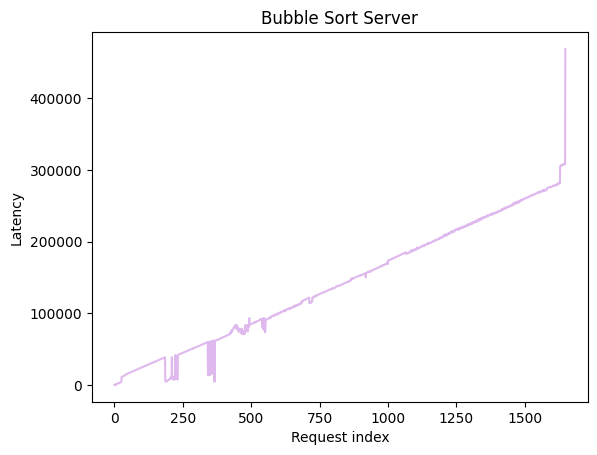

In [11]:
req_index_latency(df_b, "#DFB9ED")
plt.title("Bubble Sort Server")
plt.savefig("B_ReqIndexVSLatency.png")

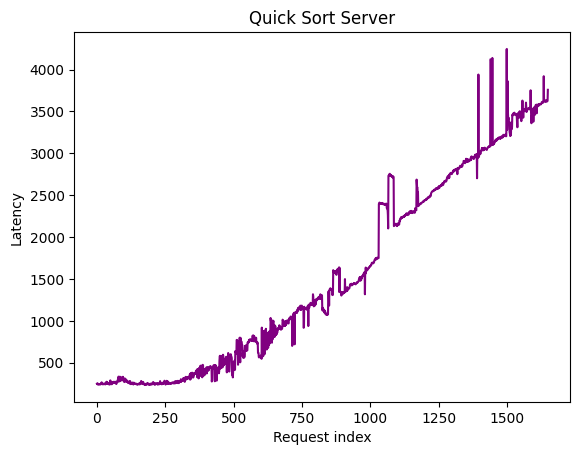

In [9]:
req_index_latency(df_q)
plt.title("Quick Sort Server")
plt.savefig("Q_ReqIndexVSLatency.png")

## Comparação entre as duas versões do servidor

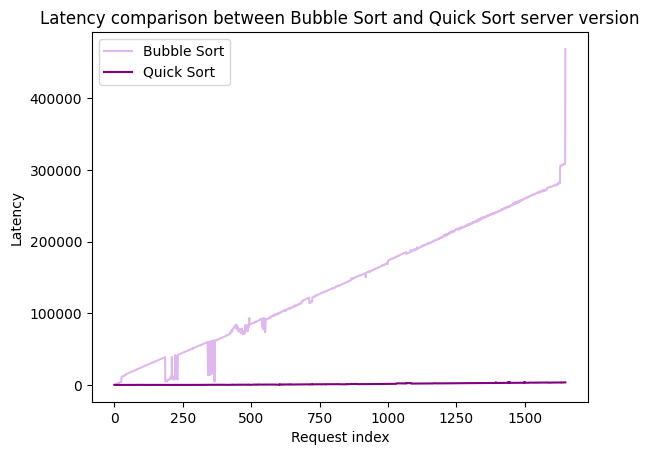

In [10]:
req_index_latency(df_b, "#DFB9ED")
req_index_latency(df_q, "purple")
plt.title("Latency comparison between Bubble Sort and Quick Sort server version")
plt.legend(["Bubble Sort", "Quick Sort"])
plt.savefig("QB_Comparison_ReqIndexVSLatency.png")